In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# 1. Data preparation
### 1.1. Exploratory Data Analysis
 

In [2]:
# Dataaset by education level
df_education= pd.read_csv("MWA27.20230614T090606.csv")
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [3]:
# Dataset by nationality
df_nat=pd.read_excel("MWA25.xlsx")
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4
...,...,...,...,...,...,...
299,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0
300,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2
301,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7
302,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8


In [4]:
# Dataset by worked hours
df_hours=pd.read_excel("MWA15.20230614T0906044.xlsx")
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3
...,...,...,...,...,...,...
283,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q3,Thousand,46.8
284,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q4,Thousand,47.3
285,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q1,Thousand,41.3
286,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q2,Thousand,30.8


In [5]:
# Dataset by economic sector
df_sector=pd.read_csv("MWA07.csv")
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [6]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic Label             1296 non-null   object 
 1   NACE Rev 2 Economic Sector  1296 non-null   object 
 2   NMW earnings status         1296 non-null   object 
 3   Quarter                     1296 non-null   object 
 4   UNIT                        1296 non-null   object 
 5   VALUE                       1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


In [7]:
df_sector.describe

<bound method NDFrame.describe of                        Statistic Label NACE Rev 2 Economic Sector  \
0     Employees aged 15 years and over  All NACE economic sectors   
1     Employees aged 15 years and over  All NACE economic sectors   
2     Employees aged 15 years and over  All NACE economic sectors   
3     Employees aged 15 years and over  All NACE economic sectors   
4     Employees aged 15 years and over  All NACE economic sectors   
...                                ...                        ...   
1291  Employees aged 15 years and over                 Not stated   
1292  Employees aged 15 years and over                 Not stated   
1293  Employees aged 15 years and over                 Not stated   
1294  Employees aged 15 years and over                 Not stated   
1295  Employees aged 15 years and over                 Not stated   

                                    NMW earnings status Quarter      UNIT  \
0     Employees reporting earning National Minimum W...  201

In [8]:
# Combined dataset
df=pd.read_excel("Data.xlsx")
df

,Quarter(hours),Usual Hours Worked,VALUE (thousand),NMW earnings status (hours),Quarter(national),Nationality,NMW earnings status (nat),VALUE (thousand).1,Quarter (edu),Education Level,NMW earnings status (edu),VALUE (edu),Year (sector),Broad Nationality Group (sector),Sex (sector),Industry Sector NACE Rev 2,VALUE (sector)
0,2016Q2,Usual hours worked,196.4,Employees reporting earning National Minimum W...,2016Q2,Total Persons,Employees reporting earning National Minimum W...,196.4,2016Q2,All levels of education,Employees reporting earning National Minimum W...,196.4,2005,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",5116.0
1,2016Q3,Usual hours worked,183.1,Employees reporting earning National Minimum W...,2016Q3,Total Persons,Employees reporting earning National Minimum W...,183.1,2016Q3,All levels of education,Employees reporting earning National Minimum W...,183.1,2006,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6032.0
2,2016Q4,Usual hours worked,154.3,Employees reporting earning National Minimum W...,2016Q4,Total Persons,Employees reporting earning National Minimum W...,154.3,2016Q4,All levels of education,Employees reporting earning National Minimum W...,154.3,2007,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6705.0
3,2017Q1,Usual hours worked,140.3,Employees reporting earning National Minimum W...,2017Q1,Total Persons,Employees reporting earning National Minimum W...,140.3,2017Q1,All levels of education,Employees reporting earning National Minimum W...,140.3,2008,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6863.0
4,2017Q2,Usual hours worked,131.7,Employees reporting earning National Minimum W...,2017Q2,Total Persons,Employees reporting earning National Minimum W...,131.7,2017Q2,All levels of education,Employees reporting earning National Minimum W...,131.7,2009,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,American (US),Female,Employer NACE not known,177.0
6758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,American (US),Female,Employer NACE not known,283.0
6759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,American (US),Female,Employer NACE not known,119.0
6760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,American (US),Female,Employer NACE not known,127.0


In [9]:
df.describe

<bound method NDFrame.describe of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2 

In [10]:
df.info

<bound method DataFrame.info of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2   

In [11]:
df.shape

(6762, 17)

In [12]:
df.dtypes

Quarter(hours)                       object
Usual Hours Worked                   object
VALUE (thousand)                    float64
NMW earnings status (hours)          object
Quarter(national)                    object
Nationality                          object
NMW earnings status (nat)            object
VALUE (thousand).1                  float64
Quarter (edu)                        object
Education Level                      object
NMW earnings status (edu)            object
VALUE (edu)                         float64
Year (sector)                         int64
Broad Nationality Group (sector)     object
Sex (sector)                         object
Industry Sector NACE Rev 2           object
VALUE (sector)                      float64
dtype: object

# 2. Data preparation and Visualisation

## **2.1. Usual Worked Hours**

In [13]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_hours['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_hours["Quarter(hours)"]=dates
# Print the converted dates
print(df_hours["Quarter(hours)"].head())

0   2016-04-01
1   2016-07-01
2   2016-10-01
3   2017-01-01
4   2017-04-01
Name: Quarter(hours), dtype: datetime64[ns]


In [14]:
df_hours.head()

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01


In [15]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage", "Variable hours (see note)"  or "Not Stated"
df_h = df_hours.drop(df_hours[(df_hours["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_hours["NMW earnings status"] == "Total employees") 
                           | (df_hours["Usual Hours Worked"] == "Variable hours (see note)") 
                           | (df_hours["NMW earnings status"] == "Total employees") 
                           | (df_hours["NMW earnings status"] == "Not stated")].index)
df_h.head()

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01


In [16]:
# Check for missing values in the DataFrame
missing_values = df_h.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
NMW earnings status    0
Usual Hours Worked     0
Quarter                0
UNIT                   0
VALUE                  4
Quarter(hours)         0
dtype: int64


In [17]:
# Drop rows with missing values
df_h = df_h.dropna()
df_h.shape

(122, 7)

In [18]:
# to change the name of the 'VALUE' column
df_h.rename(columns={'VALUE': 'VALUE(hours)'}, inplace=True)

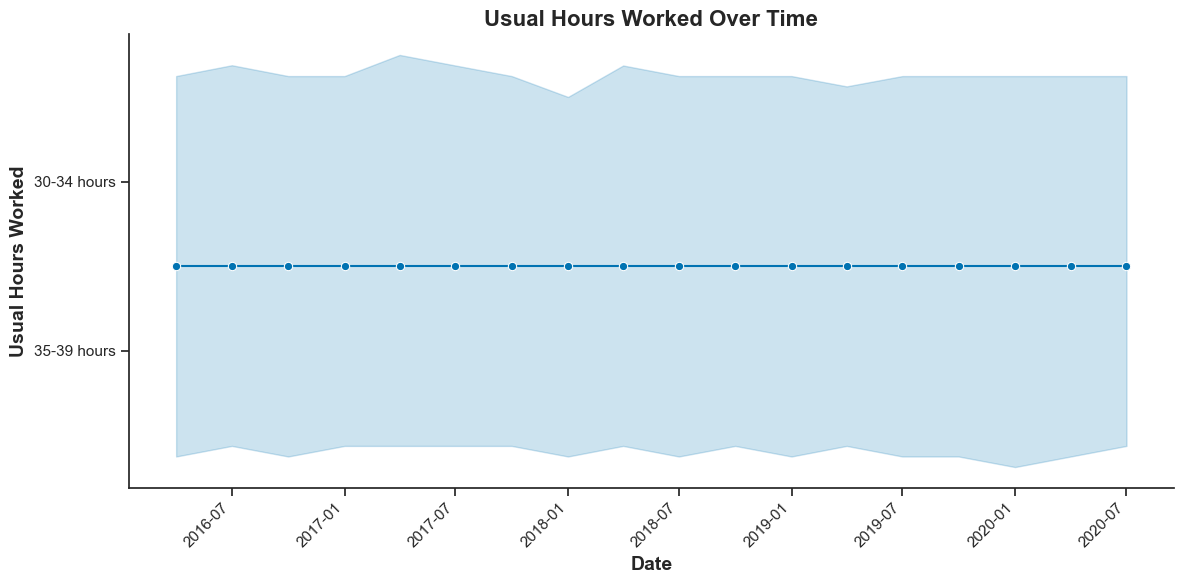

In [19]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o')

# Add labels to graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

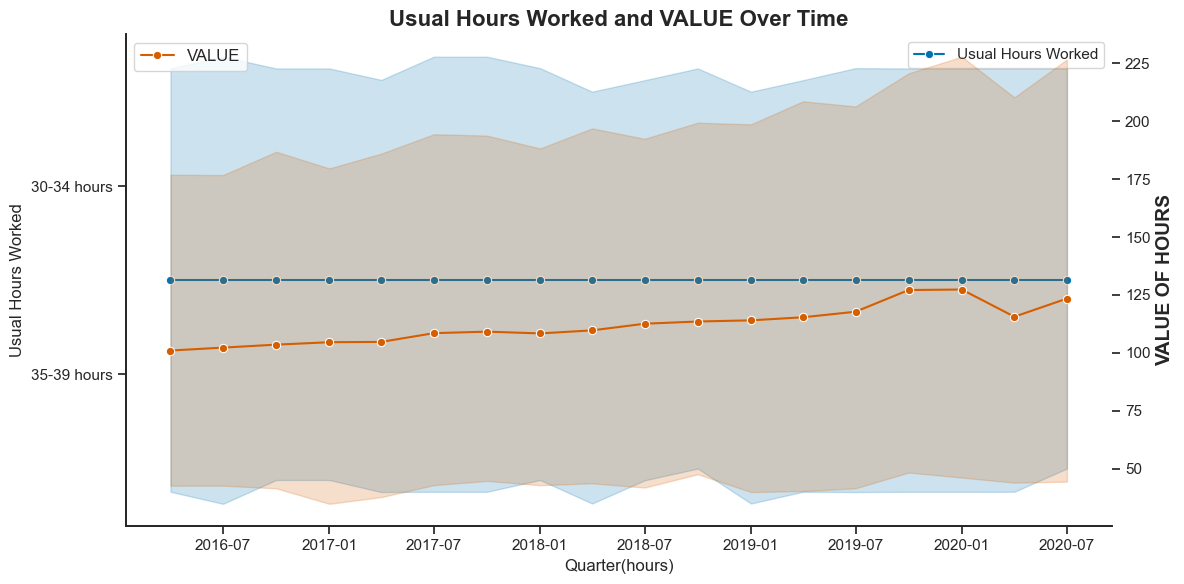

In [20]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Usual Hours Worked
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o', label='Usual Hours Worked')

# Plot VALUE on secondary y-axis
ax = plt.gca().twinx()
sns.lineplot(data=df_hours, x='Quarter(hours)', y='VALUE', color='r', marker='o', label='VALUE', ax=ax)

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
ax.set_ylabel('VALUE OF HOURS', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked and VALUE Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
# Replacing index string to integer for calculate the basic descriptive statistics
replacement_dict = {
    '1-9 hours': '0',
    '10-19 hours': '1',
    '20-29 hours': '2',
    '30-34 hours': '3',
    '35-39 hours': '4',
    '40-44 hours': '5',
    '45 hours and over': '6'
}

df_h['Usual Hours Worked'] = df_h['Usual Hours Worked'].replace(replacement_dict)

In [22]:
df_h['Year(hours)'] = df_h['Quarter(hours)'].dt.year
df_h['Month(hours)'] = df_h['Quarter(hours)'].dt.month
df_h

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE(hours),Quarter(hours),Year(hours),Month(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,0,2016Q2,Thousand,16.6,2016-04-01,2016,4
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,0,2016Q3,Thousand,12.2,2016-07-01,2016,7
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,0,2016Q4,Thousand,15.3,2016-10-01,2016,10
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,0,2017Q1,Thousand,13.7,2017-01-01,2017,1
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,0,2017Q2,Thousand,13.3,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
117,Employees aged 15 years and over,Employees reporting earning National Minimum W...,6,2018Q3,Thousand,7.1,2018-07-01,2018,7
118,Employees aged 15 years and over,Employees reporting earning National Minimum W...,6,2018Q4,Thousand,4.9,2018-10-01,2018,10
119,Employees aged 15 years and over,Employees reporting earning National Minimum W...,6,2019Q1,Thousand,7.4,2019-01-01,2019,1
120,Employees aged 15 years and over,Employees reporting earning National Minimum W...,6,2019Q2,Thousand,6.0,2019-04-01,2019,4


### **2.2. Nationality**

In [23]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_nat['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_nat["Quarter(hours)"]=dates
# Print the converted dates
print(df_nat["Quarter(hours)"])

0     2016-04-01
1     2016-07-01
2     2016-10-01
3     2017-01-01
4     2017-04-01
         ...    
299   2018-10-01
300   2019-01-01
301   2019-04-01
302   2019-07-01
303   2019-10-01
Name: Quarter(hours), Length: 304, dtype: datetime64[ns]


In [24]:
df_nat['Year(nationality)'] = df_nat['Quarter(hours)'].dt.year
df_nat['Month(nationality)'] = df_nat['Quarter(hours)'].dt.month
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
299,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0,2018-10-01,2018,10
300,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2,2019-01-01,2019,1
301,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7,2019-04-01,2019,4
302,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8,2019-07-01,2019,7


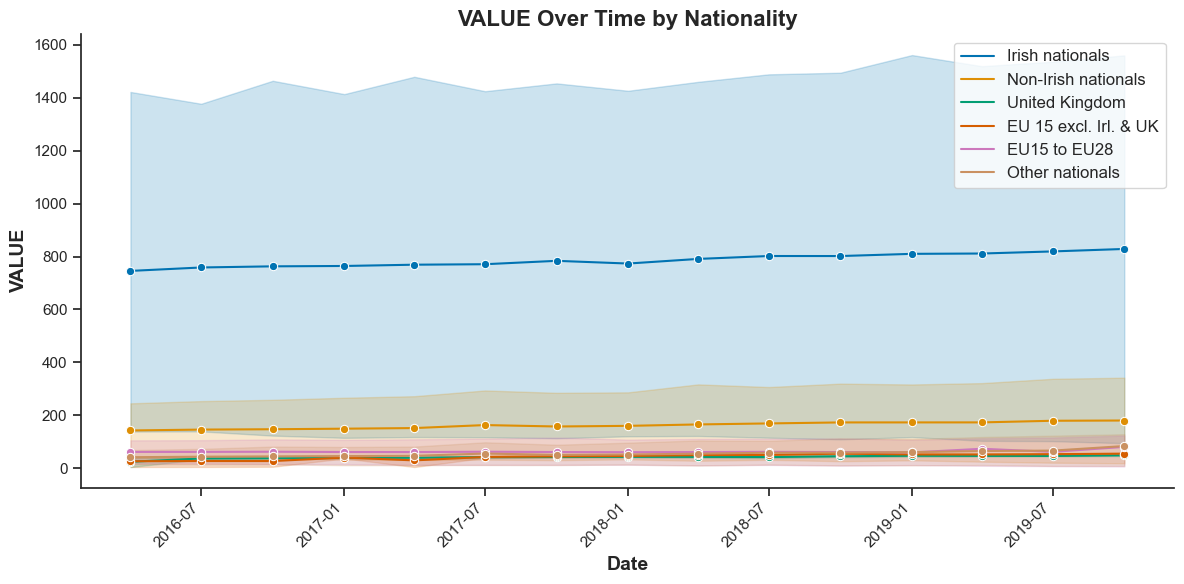

In [25]:
# Setting style for the plot
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot VALUE for each nationality
sns.lineplot(data=df_nat, x='Quarter(hours)', y='VALUE', hue='Nationality', marker='o')

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE Over Time by Nationality', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
df_nat.head()

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4


In [27]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage"
df_nation = df_nat.drop(df_nat[(df_nat["NMW earnings status"] == "Total employees") 
                           | (df_nat["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage")].index)

In [28]:
# to change the name of the 'VALUE' column
df_nation.rename(columns={'VALUE': 'VALUE(nationality)'}, inplace=True)

In [29]:
# Check for missing values in the DataFrame
missing_values = df_nation.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
Nationality            0
NMW earnings status    0
Quarter                0
UNIT                   0
VALUE(nationality)     2
Quarter(hours)         0
Year(nationality)      0
Month(nationality)     0
dtype: int64


In [30]:
# Drop rows with missing values
df_nation = df_nation.dropna()
# Check the DataFrame after dropping the rows with missing values
df_nation

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE(nationality),Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
284,Employees aged 15 years and over,Other nationals,Not stated,2018Q3,Thousand,9.6,2018-07-01,2018,7
285,Employees aged 15 years and over,Other nationals,Not stated,2018Q4,Thousand,6.6,2018-10-01,2018,10
286,Employees aged 15 years and over,Other nationals,Not stated,2019Q1,Thousand,12.4,2019-01-01,2019,1
287,Employees aged 15 years and over,Other nationals,Not stated,2019Q2,Thousand,9.7,2019-04-01,2019,4


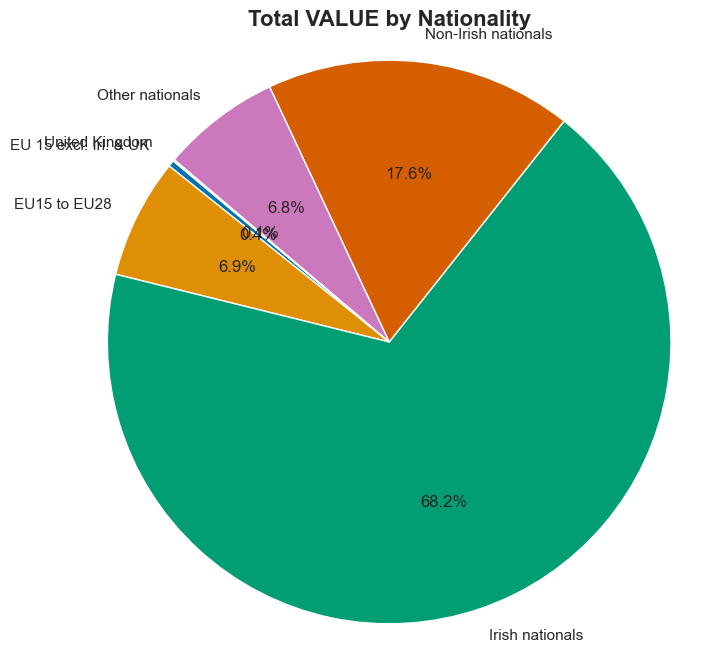

In [31]:
# Group the data by nationality and calculate the total VALUE for each group
nationality_value = df_nation.groupby('Nationality')['VALUE(nationality)'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_value['VALUE(nationality)'], labels=nationality_value['Nationality'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Total VALUE by Nationality', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()

In [32]:
replacement_dict_sector = {
    'Irish nationals': '0',
    'Non-Irish nationals': '1',
    'United Kingdom': '2',
    'EU 15 excl. Irl. & UK': '3',
    'EU15 to EU28': '4',
    'Other nationals': '5'
}

df_nation['Nationality'] = df_nation['Nationality'].replace(replacement_dict_sector)
df_nation.head()

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE(nationality),Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
1,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
2,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
3,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
4,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4


### **2.3. Economic sector**

In [33]:
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [34]:
# drop all "Not stated" values and "All NACE economic secpors" from "NACE Rev 2 Economic Sector"
df_sec=df_sector.drop(df_sector[(df_sector["NACE Rev 2 Economic Sector"] == "Not stated")
                               |(df_sector["NACE Rev 2 Economic Sector"] == "All NACE economic sectors")].index)

# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_se = df_sec.drop(df_sec[(df_sec["NMW earnings status"] == "Total employees") 
                           | (df_sec["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_sec["NMW earnings status"] == "Not stated")].index)

In [35]:
# Check for missing values in the DataFrame
missing_values = df_se.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label                 0
NACE Rev 2 Economic Sector      0
NMW earnings status             0
Quarter                         0
UNIT                            0
VALUE                         105
dtype: int64


In [36]:
# Drop rows with missing values
df_se = df_se.dropna()
# Check the DataFrame after dropping the rows with missing values
print(df_se)

                       Statistic Label             NACE Rev 2 Economic Sector  \
72    Employees aged 15 years and over  Agriculture, forestry and fishing (A)   
73    Employees aged 15 years and over  Agriculture, forestry and fishing (A)   
74    Employees aged 15 years and over  Agriculture, forestry and fishing (A)   
75    Employees aged 15 years and over  Agriculture, forestry and fishing (A)   
77    Employees aged 15 years and over  Agriculture, forestry and fishing (A)   
...                                ...                                    ...   
1165  Employees aged 15 years and over         Other NACE activities (R to U)   
1166  Employees aged 15 years and over         Other NACE activities (R to U)   
1167  Employees aged 15 years and over         Other NACE activities (R to U)   
1168  Employees aged 15 years and over         Other NACE activities (R to U)   
1169  Employees aged 15 years and over         Other NACE activities (R to U)   

                           

In [37]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_se['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_se["Quarter(hours)"]=dates

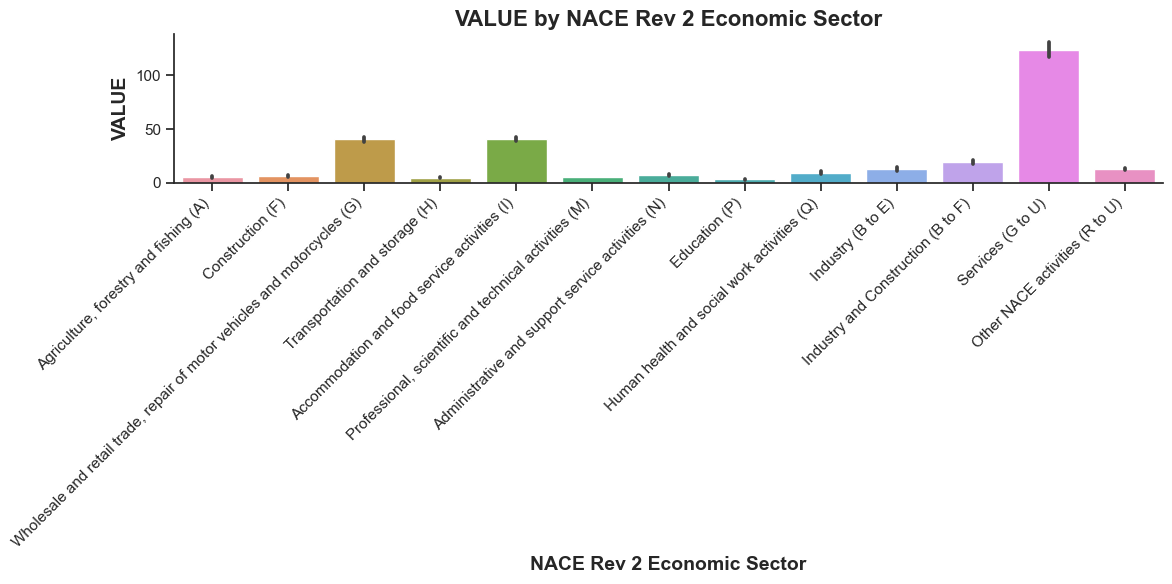

In [38]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_se, x='NACE Rev 2 Economic Sector', y='VALUE')

# Add labels to your graph
plt.xlabel('NACE Rev 2 Economic Sector', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by NACE Rev 2 Economic Sector', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
replacement_dict_sector = {
    'Agriculture, forestry and fishing (A)': '0',
    'Construction (F)': '1',
    'Wholesale and retail trade, repair of motor vehicles and motorcycles (G)': '2',
    'Transportation and storage (H)': '3',
    'Accommodation and food service activities (I)': '4',
    'Professional, scientific and technical activities (M)': '5',
    'Administrative and support service activities (N)': '6',
    'Education (P)': '7',
    'Human health and social work activities (Q)': '8',
    'Industry (B to E)': '9',
    'Industry and Construction (B to F)': '10',
    'Services (G to U)': '11',
    'Other NACE activities (R to U)': '12'
}

df_se['NACE Rev 2 Economic Sector'] = df_se['NACE Rev 2 Economic Sector'].replace(replacement_dict_sector)

In [40]:
df_se['Year(sector)'] = df_se['Quarter(hours)'].dt.year
df_se['Month(sector)'] = df_se['Quarter(hours)'].dt.month
df_se

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(sector),Month(sector)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
73,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,6.4,2016-07-01,2016,7
74,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,3.9,2016-10-01,2016,10
75,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,5.5,2017-01-01,2017,1
77,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q3,Thousand,5.0,2017-07-01,2017,7
...,...,...,...,...,...,...,...,...,...
1165,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2019Q3,Thousand,11.4,2019-07-01,2019,7
1166,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2019Q4,Thousand,10.6,2019-10-01,2019,10
1167,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2020Q1,Thousand,8.9,2020-01-01,2020,1
1168,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2020Q2,Thousand,11.0,2020-04-01,2020,4


In [41]:
# to change the name of the 'VALUE' column
df_se.rename(columns={'VALUE': 'VALUE(sector)'}, inplace=True)

In [42]:
# Assuming your DataFrame is named 'df'
df_sec = df_se[df_se['VALUE(sector)'] >= 8.0]
df_sec

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE(sector),Quarter(hours),Year(sector),Month(sector)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
144,Employees aged 15 years and over,1,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
216,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q2,Thousand,52.6,2016-04-01,2016,4
217,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q3,Thousand,47.0,2016-07-01,2016,7
218,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q4,Thousand,42.7,2016-10-01,2016,10
...,...,...,...,...,...,...,...,...,...
1165,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2019Q3,Thousand,11.4,2019-07-01,2019,7
1166,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2019Q4,Thousand,10.6,2019-10-01,2019,10
1167,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2020Q1,Thousand,8.9,2020-01-01,2020,1
1168,Employees aged 15 years and over,12,Employees reporting earning National Minimum W...,2020Q2,Thousand,11.0,2020-04-01,2020,4


### **2.4. Education level**

In [43]:
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [44]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_edu = df_education.drop(df_education[(df_education["Education Level"] == "All levels of education") 
                           | (df_education["Education Level"] == "Other/not stated") 
                           | (df_education["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_education["NMW earnings status"] == "Total employees") 
                           | (df_education["NMW earnings status"] == "Not stated")].index)

In [45]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_edu['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]
df_edu["Quarter(hours)"]=dates

In [46]:
# Check for missing values in the DataFrame
missing_values = df_edu.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
Education Level        0
NMW earnings status    0
Quarter                0
UNIT                   0
VALUE                  0
Quarter(hours)         0
dtype: int64


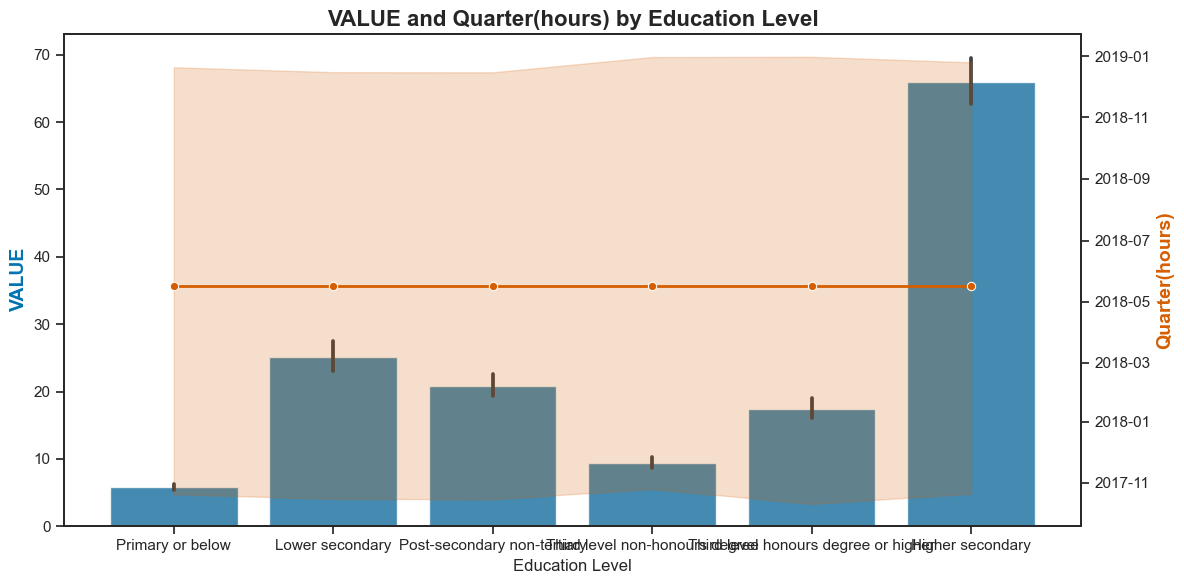

In [47]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot VALUE on the first y-axis (left y-axis)
sns.barplot(data=df_edu, x='Education Level', y='VALUE', ax=ax1, color='b', alpha=0.8)

# Set the label for the first y-axis
ax1.set_ylabel('VALUE', fontsize=14, fontweight='bold', color='b')

# Create the second y-axis (right y-axis) for Quarter(hours)
ax2 = ax1.twinx()

# Plot Quarter(hours) on the second y-axis (right y-axis)
sns.lineplot(data=df_edu, x='Education Level', y='Quarter(hours)', ax=ax2, color='r', marker='o', linewidth=2)

# Set the label for the second y-axis
ax2.set_ylabel('Quarter(hours)', fontsize=14, fontweight='bold', color='r')

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.title('VALUE and Quarter(hours) by Education Level', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


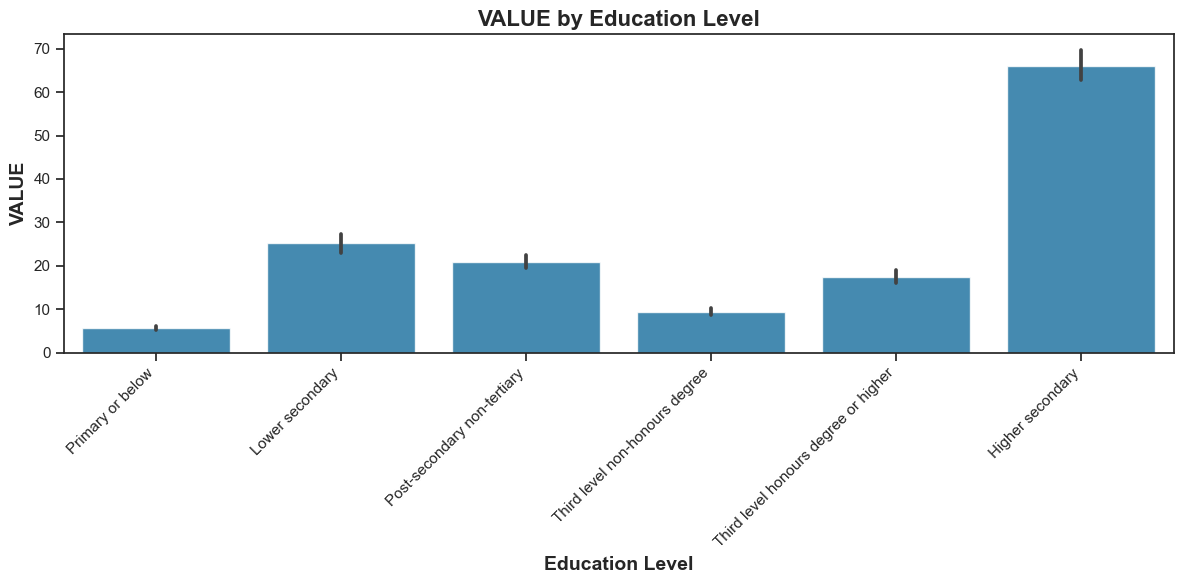

In [48]:
# Create the bar plot for VALUE
plt.figure(figsize=(12, 6))
sns.barplot(data=df_edu, x='Education Level', y='VALUE', color='b', alpha=0.8)

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by Education Level', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [49]:
replacement_dict_edu = {
    'Primary or below': '0',
    'Lower secondary': '1',
    'Post-secondary non-tertiary': '2',
    'Third level non-honours degree': '3',
    'Third level honours degree or higher':'4',
    'Higher secondary': '5',
}

df_edu['Education Level'] = df_edu['Education Level'].replace(replacement_dict_edu)

In [50]:
# to change the name of the 'VALUE' column
df_edu.rename(columns={'VALUE': 'VALUE(education)'}, inplace=True)

In [51]:
df_edu['Year(education)'] = df_edu['Quarter(hours)'].dt.year
df_edu['Month(education)'] = df_edu['Quarter(hours)'].dt.month
df_edu.head()

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE(education),Quarter(hours),Year(education),Month(education)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
73,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,6.5,2016-07-01,2016,7
74,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,7.2,2016-10-01,2016,10
75,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,5.8,2017-01-01,2017,1
76,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q2,Thousand,4.8,2017-04-01,2017,4


# 3. Applying Machine Learning Models

## 3.1. Decision Trees 

In [52]:
# Collecting X and Y values
vars_df1 = df_h[['VALUE(hours)', 'Year(hours)', "Month(hours)"]] 
vars_df2 = df_nation[['VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)"]] 
vars_df3 = df_sec[['VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)"]] 
vars_df4 = df_edu[['VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"]]  
 

# Concatenate the selected variables horizontally to create x_train
X= pd.concat([vars_df1, vars_df2, vars_df3, vars_df4], axis=1)
y=df_h["Usual Hours Worked"].values

In [53]:
X

,VALUE(hours),Year(hours),Month(hours),VALUE(nationality),Nationality,Year(nationality),Month(nationality),VALUE(sector),NACE Rev 2 Economic Sector,Year(sector),Month(sector),VALUE(education),Education Level,Year(education),Month(education)
0,16.6,2016.0,4.0,147.3,0,2016.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.2,2016.0,7.0,141.6,0,2016.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.3,2016.0,10.0,116.7,0,2016.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.7,2017.0,1.0,103.3,0,2017.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.3,2017.0,4.0,100.4,0,2017.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.3,5,2019.0,7.0
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.5,5,2019.0,10.0
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,5,2020.0,1.0
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.3,5,2020.0,4.0


In [54]:
# Reset the indices of selected variable DataFrames
vars_df1_reset = vars_df1.reset_index(drop=True)
vars_df2_reset = vars_df2.reset_index(drop=True)
vars_df3_reset = vars_df3.reset_index(drop=True)
vars_df4_reset = vars_df4.reset_index(drop=True)

# Concatenate the selected variables horizontally to create x
X = pd.concat([vars_df1_reset, vars_df2_reset, vars_df3_reset, vars_df4_reset], axis=1)

In [55]:
X

,VALUE(hours),Year(hours),Month(hours),VALUE(nationality),Nationality,Year(nationality),Month(nationality),VALUE(sector),NACE Rev 2 Economic Sector,Year(sector),Month(sector),VALUE(education),Education Level,Year(education),Month(education)
0,16.6,2016.0,4.0,147.3,0,2016.0,4.0,8.1,0,2016,4,8.1,0,2016.0,4.0
1,12.2,2016.0,7.0,141.6,0,2016.0,7.0,8.1,1,2016,4,6.5,0,2016.0,7.0
2,15.3,2016.0,10.0,116.7,0,2016.0,10.0,52.6,2,2016,4,7.2,0,2016.0,10.0
3,13.7,2017.0,1.0,103.3,0,2017.0,1.0,47.0,2,2016,7,5.8,0,2017.0,1.0
4,13.3,2017.0,4.0,100.4,0,2017.0,4.0,42.7,2,2016,10,4.8,0,2017.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4,12,2019,7,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,12,2019,10,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9,12,2020,1,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,12,2020,4,NaN,NaN,NaN,NaN


In [56]:
X.to_csv('out.csv', index=False)

In [57]:
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6'], dtype=object)

In [58]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (129, 15)
y shape: (122,)


### Splitting the dataset into the Training set and Test set


In [59]:
# Check for missing values in X 
missing_values = X.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

VALUE(hours)                   7
Year(hours)                    7
Month(hours)                   7
VALUE(nationality)             7
Nationality                    7
Year(nationality)              7
Month(nationality)             7
VALUE(sector)                  0
NACE Rev 2 Economic Sector     0
Year(sector)                   0
Month(sector)                  0
VALUE(education)              21
Education Level               21
Year(education)               21
Month(education)              21
dtype: int64


In [60]:
# Drop the last 14 rows from the DataFrame 'df'
X = X.iloc[:-21]
y = y[:-14]

In [61]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 15), (108,), (81, 15), (27, 15), (81,), (27,))

### Training the Decision Tree Classification model on the Training set

In [62]:
print("X data types:", X.dtypes)
print("y data type:", y.dtype)

X data types: VALUE(hours)                  float64
Year(hours)                   float64
Month(hours)                  float64
VALUE(nationality)            float64
Nationality                    object
Year(nationality)             float64
Month(nationality)            float64
VALUE(sector)                 float64
NACE Rev 2 Economic Sector     object
Year(sector)                    int64
Month(sector)                   int64
VALUE(education)              float64
Education Level                object
Year(education)               float64
Month(education)              float64
dtype: object
y data type: object


In [63]:
X

,VALUE(hours),Year(hours),Month(hours),VALUE(nationality),Nationality,Year(nationality),Month(nationality),VALUE(sector),NACE Rev 2 Economic Sector,Year(sector),Month(sector),VALUE(education),Education Level,Year(education),Month(education)
0,16.6,2016.0,4.0,147.3,0,2016.0,4.0,8.1,0,2016,4,8.1,0,2016.0,4.0
1,12.2,2016.0,7.0,141.6,0,2016.0,7.0,8.1,1,2016,4,6.5,0,2016.0,7.0
2,15.3,2016.0,10.0,116.7,0,2016.0,10.0,52.6,2,2016,4,7.2,0,2016.0,10.0
3,13.7,2017.0,1.0,103.3,0,2017.0,1.0,47.0,2,2016,7,5.8,0,2017.0,1.0
4,13.3,2017.0,4.0,100.4,0,2017.0,4.0,42.7,2,2016,10,4.8,0,2017.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,19.0,2019.0,7.0,15.0,5,2018.0,10.0,114.6,11,2018,10,61.3,5,2019.0,7.0
104,15.9,2019.0,10.0,9.4,5,2019.0,1.0,128.7,11,2019,1,59.5,5,2019.0,10.0
105,15.2,2020.0,1.0,14.1,5,2019.0,4.0,112.2,11,2019,4,62.0,5,2020.0,1.0
106,24.5,2020.0,4.0,12.4,5,2019.0,7.0,110.8,11,2019,7,54.3,5,2020.0,4.0


In [64]:
X.to_csv('output_file.csv', index=False)

In [65]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [66]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)
y_pred[0:10]

array(['3', '0', '2', '0', '2', '1', '3', '0', '3', '4'], dtype=object)

### Making the Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      1.00      0.75         3
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3

    accuracy                           0.93        27
   macro avg       0.93      0.95      0.93        27
weighted avg       0.96      0.93      0.93        27



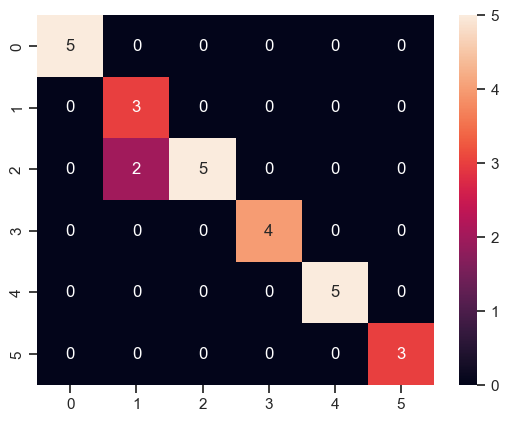

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics                         

# Model Accuracy, how often is the classifier correct?
print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.9259259259259259


[Text(0.5555555555555556, 0.9, 'x[11] <= 45.85\ngini = 0.832\nsamples = 81\nvalue = [13, 15, 11, 14, 13, 15]'),
 Text(0.4444444444444444, 0.7, 'x[12] <= 1.5\ngini = 0.798\nsamples = 66\nvalue = [13, 15, 11, 14, 13, 0]'),
 Text(0.2222222222222222, 0.5, 'x[11] <= 11.85\ngini = 0.497\nsamples = 28\nvalue = [13, 15, 0, 0, 0, 0]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 16.4\ngini = 0.663\nsamples = 38\nvalue = [0, 0, 11, 14, 13, 0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0, 0]'),
 Text(0.7777777777777778, 0.3, 'x[8] <= 8.5\ngini = 0.497\nsamples = 24\nvalue = [0, 0, 11, 0, 13, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0, 0]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 13, 0]'),
 Text(0.666666

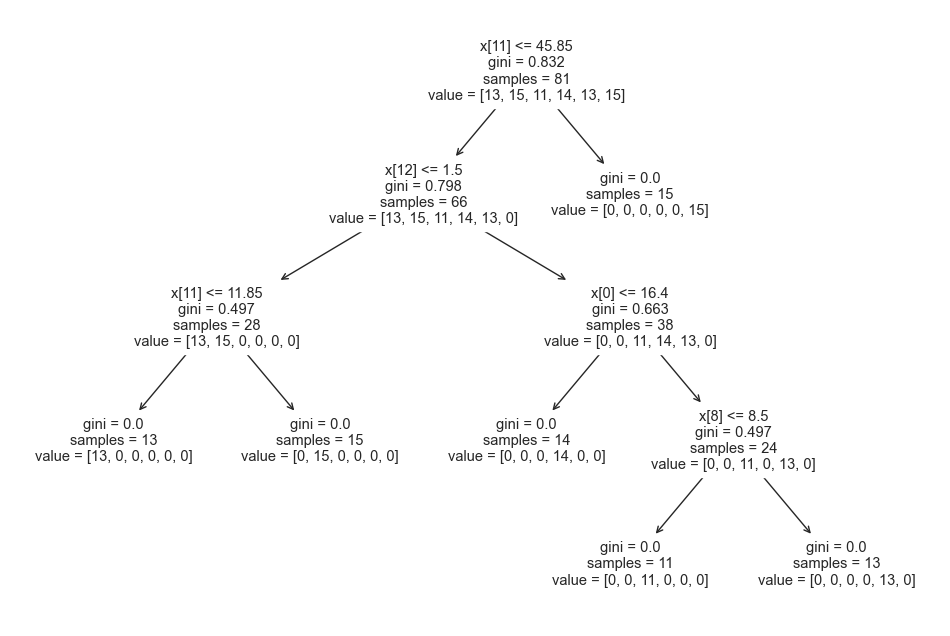

In [69]:
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

### Implementation
So, I have created a model that uses decision tree algorithm to predict the weekly usual working hours of minimum wage workers. The Accuracy of the model is 96.4%. 

## 4.2. Random Forest


In [70]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred[0:10]

array(['3', '0', '2', '0', '2', '1', '3', '0', '3', '4'], dtype=object)

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      1.00      0.75         3
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3

    accuracy                           0.93        27
   macro avg       0.93      0.95      0.93        27
weighted avg       0.96      0.93      0.93        27



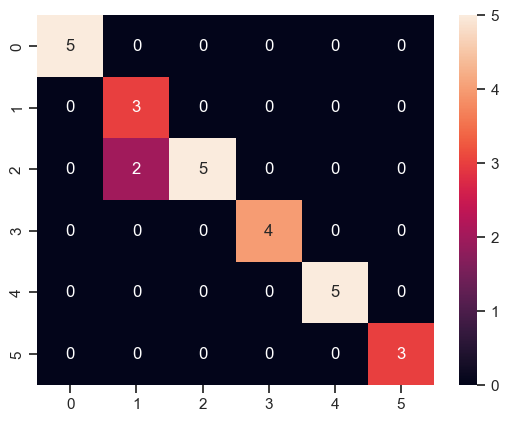

In [72]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm2 = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm2, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [73]:
pd.crosstab(y_test, y_pred, rownames=["Actual hours"], colnames=["Predicted hours"])

Predicted hours,0,1,2,3,4,5
Actual hours,,,,,,
0,5,0,0,0,0,0
1,0,3,0,0,0,0
2,0,2,5,0,0,0
3,0,0,0,4,0,0
4,0,0,0,0,5,0
5,0,0,0,0,0,3


# 5. Finding Important Features in Scikit-learn


In [74]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# # Collecting X and Y values
vars_df1 = df_h[['VALUE(hours)', 'Year(hours)', "Month(hours)"]] 
vars_df2 = df_nation[['VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)"]] 
vars_df3 = df_sec[['VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)"]] 
vars_df4 = df_edu[['VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"]]  

In [76]:
feature_imp = pd.Series(clf.feature_importances_, index=['VALUE(hours)', 'Year(hours)', "Month(hours)",
                       'VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)",                                 
                       'VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)",
                       'VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"                                
                        ]).sort_values(ascending=False)
feature_imp

Education Level               0.222679
VALUE(education)              0.158383
NACE Rev 2 Economic Sector    0.130401
VALUE(hours)                  0.130080
VALUE(nationality)            0.119379
Nationality                   0.091964
VALUE(sector)                 0.089592
Year(nationality)             0.011593
Year(sector)                  0.008801
Year(hours)                   0.008770
Year(education)               0.006706
Month(nationality)            0.006547
Month(sector)                 0.005889
Month(education)              0.005389
Month(hours)                  0.003828
dtype: float64

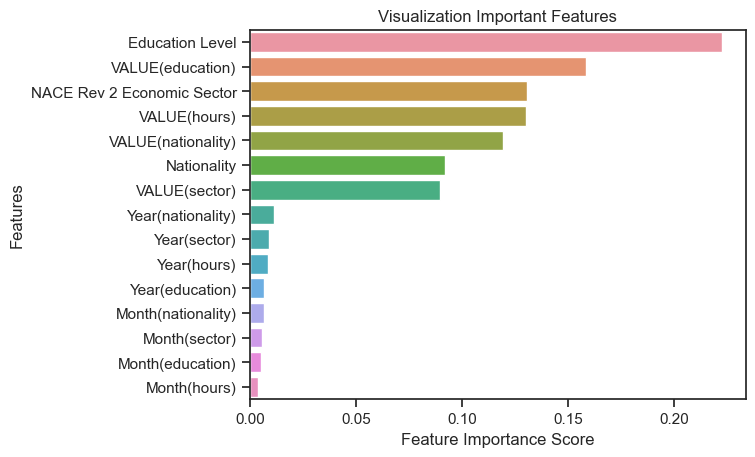

In [77]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization Important Features")
#plt.legend()
plt.show()

### 4.3. Keras model

In [78]:
# fit the keras model on the dataset
#model.fit(X_train, y_train, epochs=100, batch_size=32)

In [79]:
from keras.models import Sequential
from keras.layers import Dense
#define the keras model
#model= Sequential()
#model.add(Dense(12, input_dim=6, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [80]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])